# Heart Disease
- The aim of this project is to create a model that determines if a patient has heart disease, based on the explanatory variables given.This would help in early diagnosis and treatment. 
## Dataset 
- The dataset was sourced from Kaggle

  ## Data Description
|  Variable 	|  Description	|
|---------------|:---------------|
| Patient_id 	| Patients Identification  
| Age  	   	    | Age in years
| Sex 	     	| 1-male, 0- female
| ChestPain     | Chest Pain Type
|               | -typical angina
|               | -atypical angina
|               | -non-anginal pain
|               | -asymptomatic 
| RestBP        | Normal Blood Pressure
| Chol          | Serum cholestoral in mg/dl 
| Fbs           | fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
| RestECG       | resting electrocardiographic results
|               | 0: normal
|               | 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV
|               | 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
|MaxHR          | Maximum Heart Rate
|ExAng          | Exercise induced angina (1 = yes; 0 = no)
|Oldpeak        | ST depression Induced by exercise relative to rest
|Slope          | The slope of the peak exercise ST segment
|               |  1: upsloping
|               |  2: flat
|               |  3: downsloping
|Ca             | Number of major vessels(0-3) colored by flourosopy
|Thal           | Thalium Stress Test Result
|               |  normal
|               |  fixed defect
|               |  reversible defect
|AHD            | Heart Disease (1 = yes; 0 = No)

In [1]:
import sys

In [2]:
sys.getdefaultencoding()

'utf-8'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_heart = pd.read_csv('Heart.csv')

In [3]:
df_heart.head()

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
# Determine the dataset shape
df_heart.shape

(303, 15)

In [5]:
df_heart.describe()

,Patient_Id,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


# Data Preparation and Exploration

- Identify missing values if present

In [6]:
df_heart.isnull().sum()

Patient_Id    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

- Ca and Thal features have some missing values, the amount missing are quite low and can therefore be dropped

In [7]:
df_heart.dropna()

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [8]:
# Identify the Categorical and Numerical features
numerical_features = df_heart.select_dtypes(np.number).columns
categorical_features = df_heart.select_dtypes(np.object).columns

<ipython-input-8-b4afb6c95f95>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df_heart.select_dtypes(np.object).columns


In [9]:
df_heart[categorical_features].head()

,ChestPain,Thal,AHD
0,typical,fixed,No
1,asymptomatic,normal,Yes
2,asymptomatic,reversable,Yes
3,nonanginal,normal,No
4,nontypical,normal,No


In [10]:
df_heart[numerical_features].head()

,Patient_Id,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0


<AxesSubplot:xlabel='AHD', ylabel='count'>

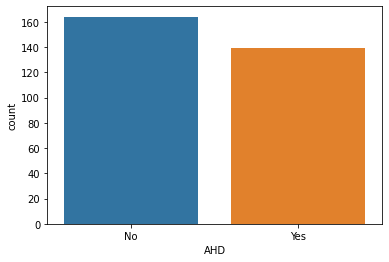

In [11]:
#Check if response variable is imbalanced
sns.countplot(x="AHD", data=df_heart)

- Response data is not heavily imbalanced, SMOTE technique will not be necessary

<AxesSubplot:xlabel='AHD', ylabel='count'>

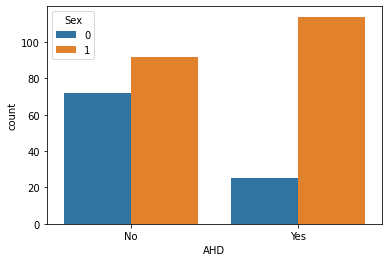

In [12]:
#response data based on gender
# 0 - female
# 1 - male
sns.countplot(x="AHD", hue="Sex", data=df_heart)

- From the plot above we see the count for male is much higher in response variable for positive diagnosis of AHD

<AxesSubplot:xlabel='Sex', ylabel='count'>

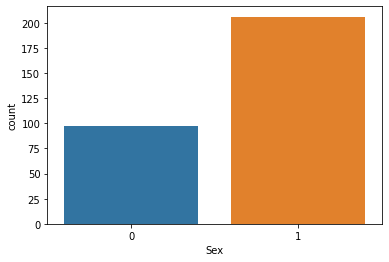

In [13]:
sns.countplot(x="Sex", data=df_heart)

<AxesSubplot:xlabel='AHD', ylabel='count'>

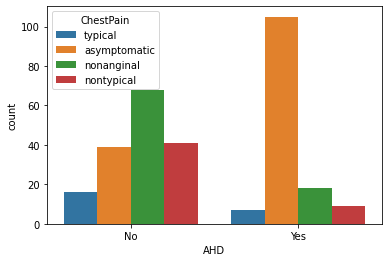

In [14]:
# Checking chest pain and response data
sns.countplot(x="AHD", hue="ChestPain", data=df_heart)

<AxesSubplot:xlabel='Ca', ylabel='count'>

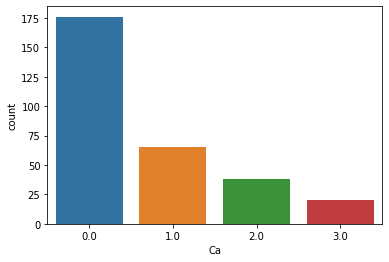

In [15]:
sns.countplot(x="Ca", data=df_heart)

<AxesSubplot:ylabel='Frequency'>

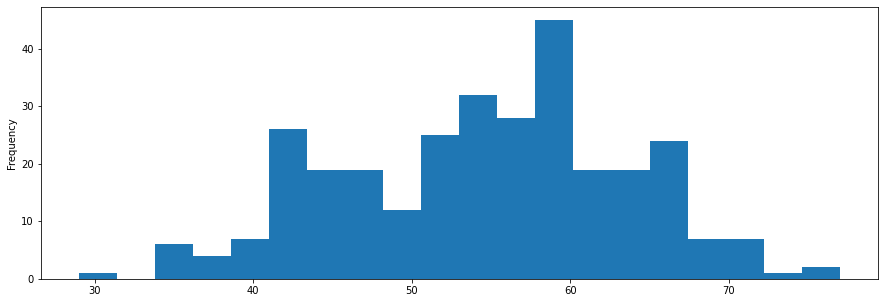

In [16]:
# Age distribution
df_heart["Age"].plot.hist(bins=20, figsize=(15,5))

<AxesSubplot:xlabel='Thal', ylabel='count'>

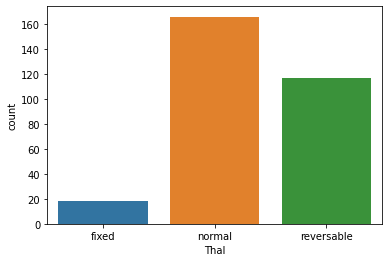

In [17]:
sns.countplot(x="Thal", data=df_heart)

<AxesSubplot:xlabel='ChestPain', ylabel='count'>

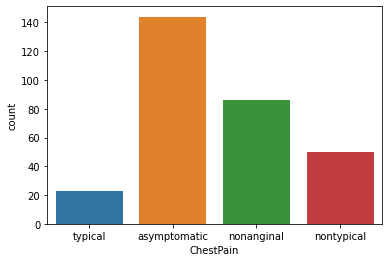

In [18]:
sns.countplot(x="ChestPain", data=df_heart)

### Encoding the categorical data

In [19]:
ChestPain_num = pd.get_dummies(df_heart['ChestPain'], prefix="ChestPain", prefix_sep ='_')

In [20]:
ChestPain_num

,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,1,0,0,0
300,1,0,0,0
301,0,0,1,0


In [21]:
Thal_num = pd.get_dummies(df_heart['Thal'], prefix="Thal", prefix_sep ='_')

In [22]:
Thal_num

,Thal_fixed,Thal_normal,Thal_reversable
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
298,0,0,1
299,0,0,1
300,0,0,1
301,0,1,0


In [23]:
df_heart['AHD_binary'] = np.where(df_heart['AHD'] == 'Yes', 1,0)

In [24]:
df_heart.head()

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AHD_binary
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


In [25]:
df_heart['AHD_binary'].value_counts()

0    164
1    139
Name: AHD_binary, dtype: int64

In [26]:
#save the response variable
y = df_heart['AHD_binary']

In [27]:
df_h = df_heart.drop(['AHD','AHD_binary'],axis=1)

In [28]:
df_h.head()

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal


In [29]:
#concat the other categorical to numerical data
heart_num = pd.concat([df_h, ChestPain_num, Thal_num,y], axis=1)

In [30]:
heart_num.head()

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,...,Ca,Thal,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_binary
0,1,63,1,typical,145,233,1,2,150,0,...,0.0,fixed,0,0,0,1,1,0,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,...,3.0,normal,1,0,0,0,0,1,0,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,...,2.0,reversable,1,0,0,0,0,0,1,1
3,4,37,1,nonanginal,130,250,0,0,187,0,...,0.0,normal,0,1,0,0,0,1,0,0
4,5,41,0,nontypical,130,204,0,2,172,0,...,0.0,normal,0,0,1,0,0,1,0,0


In [31]:
#drop columns with categorical data and patient_id
heart_dataset = heart_num.drop(['ChestPain','Thal','Patient_Id'],axis=1)

In [32]:
heart_dataset.isna().sum()

Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        4
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
AHD_binary                0
dtype: int64

In [33]:
heart_final = heart_dataset.dropna()

In [34]:
heart_final.isna().sum()

Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        0
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
AHD_binary                0
dtype: int64

In [101]:
X = heart_final.iloc[:,0:-1]
y = heart_final.iloc[:,-1]
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,2,0.0,1,0,0,0,0,0,1
298,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1


# Feature Selection

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [37]:
print(model.feature_importances_)

[0.06764353 0.03661199 0.05444676 0.05550616 0.01824604 0.03302107
 0.06896029 0.06671917 0.0718326  0.05509003 0.11270594 0.1126289
 0.03105513 0.0140452  0.01470453 0.00946393 0.09914896 0.07816976]


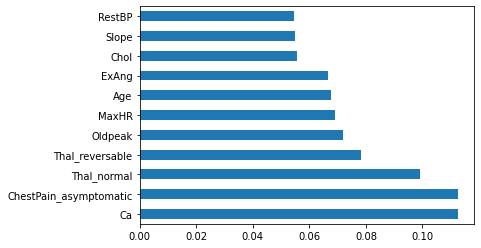

In [38]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(11).plot(kind='barh')
plt.show()

### The chart above shows the main features contributing to the various responses. The model however will be trained with all features because they are not alot.

# Model Build
- Various suprevised classification models will be built to determine the best model.

In [75]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.23,random_state=42)

In [76]:
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable'],
      dtype='object')
Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable'],
      dtype='object')


## Training the Logistic Regression model on the Training set

In [77]:
 from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(X_train,y_train)

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [79]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.8405797101449275

In [80]:
y_pred = pipe.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [82]:
accuracy_score(y_test,y_pred)

0.8405797101449275

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.82      0.79      0.81        29

    accuracy                           0.84        69
   macro avg       0.84      0.83      0.84        69
weighted avg       0.84      0.84      0.84        69



In [84]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

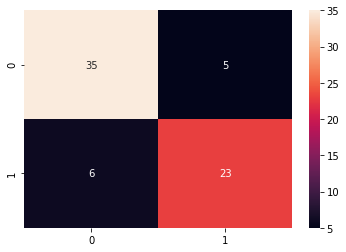

In [85]:
sns.heatmap(cm,annot=True)

# Applying k-Fold Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.04 %
Standard Deviation: 5.65 %


# Random Forest Classifier - Model 2

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
classifier2 = RandomForestClassifier()

In [89]:
classifier2.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
y_pred = classifier2.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred)

0.8405797101449275

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        40
           1       0.85      0.76      0.80        29

    accuracy                           0.84        69
   macro avg       0.84      0.83      0.83        69
weighted avg       0.84      0.84      0.84        69



In [93]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

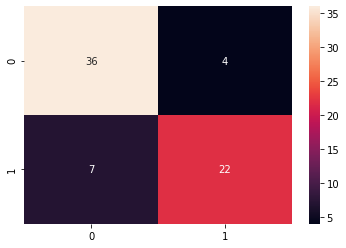

In [94]:
sns.heatmap(cm,annot=True)

# XGBoost - Model 3

## Training the XGBoost Model

In [95]:
from xgboost import XGBClassifier
classifier3 = XGBClassifier()
classifier3.fit(X_train, y_train)

[14:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\King\anaconda3\envs\heartdisease\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
y_pred = classifier3.predict(X_test)
accuracy_score(y_test, y_pred)

0.782608695652174

<AxesSubplot:>

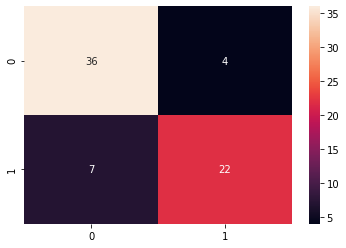

In [97]:
sns.heatmap(cm,annot=True)

# Summary of result

- The accuracy of all three models are quite good, with the Logistic Regression and Random forest model having high accuracies of 84%. The k-fold accuracy was quite high, 83%, which further gives confidence to our models results.
- Beyond the accuracy, the confusion matrix and a classification report was also checked. This showed a good balance between the prescision and recall leading to a good f1 score.
- For further analysis, a more gender balanced dataset would further improve the models perfromance.

In [ ]:
#The logistic Regression model had the best performance, therefore the model will be deployed with the logistic regression model

In [98]:
import pickle


In [99]:
with open('classifier_mod2.pkl','wb') as f:
    pickle.dump(pipe,f)


In [100]:
with open('classifier_mod2.pkl','rb') as f:
    model = pickle.load(f)